Import tensorflow, and reset graph

In [1]:
#
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('datasets\mnist')

Extracting datasets\mnist\train-images-idx3-ubyte.gz
Extracting datasets\mnist\train-labels-idx1-ubyte.gz
Extracting datasets\mnist\t10k-images-idx3-ubyte.gz
Extracting datasets\mnist\t10k-labels-idx1-ubyte.gz


In [3]:
#
tf.reset_default_graph()

In [4]:
#
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01

# Add noise to data

In [5]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
training = tf.placeholder_with_default(False, shape=(), name='training')

In [6]:
# Add gaussin noise
noise_level = 1.0
X_noisy = X + noise_level * tf.random_normal(tf.shape(X))


# use drop out
# drop_rate = 0.3
# X_noisy = tf.layers.dropout(X, drop_rate, training=training)

# Version 1: no dropout

In [7]:
with tf.name_scope('nn'):
    hidden1 = tf.layers.dense(X_noisy, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, 
                              name="hidden2")                       
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu,
                              name="hidden3")                           
    outputs = tf.layers.dense(hidden3, n_outputs, name="outputs") 


In [8]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(outputs - X))

In [9]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [10]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [11]:
n_epoches = 20
batch_size = 50
n_step = mnist.train.num_examples // batch_size

In [12]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epoches):
        for step in range(n_step):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, training: True})
        loss_train = loss.eval(feed_dict={X: X_batch})
        print("Epoch: {}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess, "tmp/my_model_stacked_denoising.ckpt")

Epoch: 0 Train MSE: 0.0419317
Epoch: 1 Train MSE: 0.0374756
Epoch: 2 Train MSE: 0.0349893
Epoch: 3 Train MSE: 0.0352223
Epoch: 4 Train MSE: 0.0322926
Epoch: 5 Train MSE: 0.0335435
Epoch: 6 Train MSE: 0.0291172
Epoch: 7 Train MSE: 0.0339018
Epoch: 8 Train MSE: 0.0312829
Epoch: 9 Train MSE: 0.0312467
Epoch: 10 Train MSE: 0.0288671
Epoch: 11 Train MSE: 0.0307829
Epoch: 12 Train MSE: 0.0304649
Epoch: 13 Train MSE: 0.030755
Epoch: 14 Train MSE: 0.0281252
Epoch: 15 Train MSE: 0.0305665
Epoch: 16 Train MSE: 0.0304098
Epoch: 17 Train MSE: 0.0341688
Epoch: 18 Train MSE: 0.0296405
Epoch: 19 Train MSE: 0.0308977


In [13]:
with tf.Session() as sess:
    saver.restore(sess, 'tmp/my_model_stacked_denoising.ckpt')
    X_test = mnist.test.images[:2]
    output_val = outputs.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from tmp/my_model_stacked_denoising.ckpt


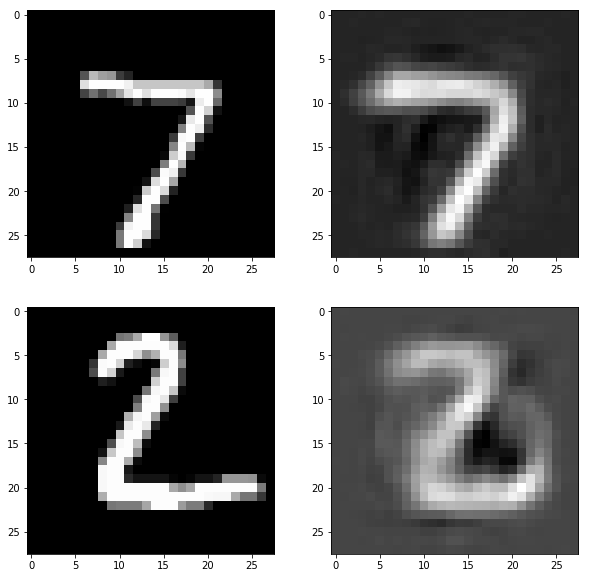

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(mnist.test.images[0, :].reshape([-1, 28]), cmap='gray')
axes[0, 1].imshow(output_val[0, :].reshape([-1, 28]), cmap='gray')
axes[1, 0].imshow(mnist.test.images[1, :].reshape([-1, 28]), cmap='gray')
axes[1, 1].imshow(output_val[1, :].reshape([-1, 28]), cmap='gray')